# 1 Anomaly detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

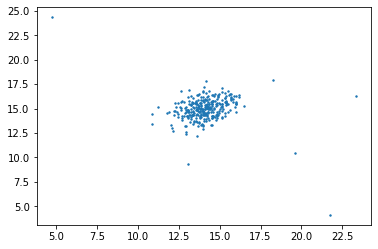

In [2]:
data = loadmat('../data/ex8data1.mat', squeeze_me=True)
X = data['X']*1.0
Xval = data['Xval']*1.0
yval = data['yval']*-1*-1

plt.scatter(X[:,0], X[:,1], s=2)
plt.show()

## 1.2 Estimating parameters for a Gaussian

In [3]:
def estimateGaussian(X):
    
    mu = X.mean(axis = 0)
    var = X.var(axis = 0)
    
    return mu, var

In [4]:
def computeProb(X,mu,var):
    norm_factor = 1/np.sqrt(2*np.pi*var)
    norm_factor.shape
    prob = norm_factor * np.exp(-((X-mu)**2)/(2*var))
    return prob.prod(axis=1)

In [5]:
def visualizeFit(X,  mu, var, res = 100):

    x0_range = np.linspace(X[:,0].min(),X[:,0].max(),  res)
    x1_range = np.linspace(X[:,1].min(),X[:,1].max(),  res)

    xx, yy = np.meshgrid(x0_range, x1_range)

    X_plot = np.stack([xx.ravel(), yy.ravel()], axis=1)

    prob = computeProb(X_plot,mu,var)

    Z = prob.reshape(xx.shape)

    plt.contour(xx,yy,Z, np.logspace(-20, -3,num=10, base=np.e))
    plt.scatter(X[:,0], X[:,1], s=2)
    plt.show()

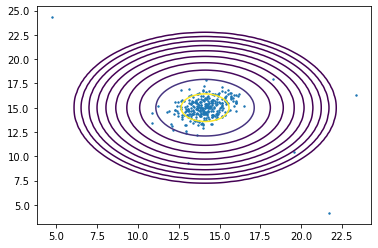

In [6]:
mu, var = estimateGaussian(X)
visualizeFit(X,  mu, var)

## 1.3 Selecting the threshold

In [7]:
def selectThreshold(pval, yval):
    epsVec = np.linspace(pval.min(), pval.max(), num=1000)

    best_eps = epsVec[0]
    max_F1 = -1.0
    F1Vec = np.zeros(len(epsVec))

    for i, eps in enumerate(epsVec):
        # predict with given epsilon
        pred = (pval < eps)*1

        # compute F1 
        tp = ((pred==1)*(yval==1)).sum()
        fp = ((yval-pred)==(-1)).sum()
        fn = ((yval-pred)==(1)).sum()

        prec = tp/(tp+fp)
        rec = tp/(tp+fn)

        F1 = 2*prec*rec/(prec+rec)

        F1Vec[i] = F1

        # mantain best epsilon
        if F1 > max_F1:
            best_eps = eps
            max_F1 = F1
            best_pred = pred


#     plt.plot(epsVec, F1Vec, '.')
#     plt.xlabel('epsilon')
#     plt.ylabel('F1')
#     print('max eps: %.2E\nmin eps: %.2E' % (epsVec.max(), epsVec.min()))


    return  best_eps, max_F1

In [8]:
pval = computeProb(Xval,mu,var)
best_eps, max_F1 = selectThreshold(pval, yval)
print('best epsilon: %.2E \nbest F1: %f' % (best_eps, max_F1))

best epsilon: 9.00E-05 
best F1: 0.875000


/home/ofir/miniconda3/envs/pandas_exercises/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


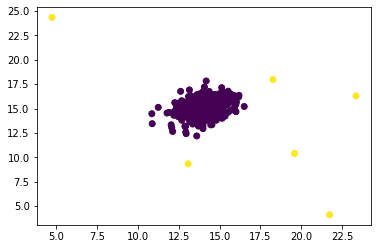

In [9]:
X_prob =  computeProb(X,mu,var)
X_pred = (X_prob < best_eps) * 1

plt.scatter(X[:,0], X[:,1], c=X_pred)

## 1.4 High dimensional dataset

In [10]:
# get data
data = loadmat('../data/ex8data2.mat', squeeze_me=True)
X = data['X']*1.0
Xval = data['Xval']*1.0
yval = data['yval']*-1*-1

# estimate the Gaussian parameters
mu, var = estimateGaussian(X)

# find the best threshold
pval = computeProb(Xval,mu,var)
best_eps, max_F1 = selectThreshold(pval, yval)

print('best epsilon: %.2E \nbest F1: %f' % (best_eps, max_F1))

# 
X_prob =  computeProb(X,mu,var)
num_anomalies = (X_prob < best_eps).sum()

print('anomalies found: ' + str(num_anomalies))

best epsilon: 1.38E-18 
best F1: 0.615385
anomalies found: 117


/home/ofir/miniconda3/envs/pandas_exercises/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
